In [26]:
#importing required libraries
import  os
import numpy as np
import pandas as pd
import scipy.stats
import sklearn
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [27]:
#classes for reading data
class DataModels:
    data=[]
    results=[]
    x_train=[]
    x_test=[]
    y_train=[]
    y_test=[]
    filepath='Regression_data'
    
    def __init__(self):
        filepath='Regression_data'
        load_data=np.genfromtxt(os.path.join(filepath, filename), delimiter=',' ,\
                             usecols=np.arange(unpredictable, columns), skip_header=skiprows)
        
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        
    def pre_process(self):
        
        #self.data=self.missing_values(self.data)
        np.random.seed(0)
        self.x_train, self.x_test,\
        self.y_train, self.y_test =sklearn.model_selection.train_test_split(self.data, self.results, test_size=0.3, \
                                                                                random_state=15)
        scaler=sklearn.preprocessing.StandardScaler().fit(self.x_train)
        self.x_train=scaler.transform(self.x_train)
        self.x_test=scaler.transform(self.x_test)
        
    def missing_values(self, data):
        imputer = sklearn.impute.SimpleImputer(missing_values=np.nan, strategy='mean')
        imputer.fit(data)
        return imputer.transform(data)
        
class Communities(DataModels):
    
    def __init__(self):
        
        load_data=np.genfromtxt(os.path.join(self.filepath, 'communities.data'), delimiter=',' ,\
                                usecols=np.arange(5, 128), skip_header=0)
        
        self.data=load_data[:,:-1]
        self.data=self.missing_values(self.data)
        self.results = load_data[:,-1]
        self.pre_process()
        
class Bike(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'hour.csv'), delimiter=',' ,\
                             usecols=np.arange(2, 17), skiprows=1)
        
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        self.pre_process()

class Facebook(DataModels):
    def __init__(self):
        
        def to_int(s):
            if s.decode('utf-8')=="Photo":
                return 0
            elif s.decode('utf-8')=="Status":
                return 1
            elif s.decode('utf-8')=="Link":
                return 2
            else:
                return 3
        
        load_data=np.genfromtxt(os.path.join(self.filepath, 'dataset_Facebook.csv'), delimiter=';' , converters={1:to_int},\
                                skip_header=1, dtype=np.int32 )
        

       
        self.data=load_data[:, :-1]
        self.results = load_data[:,-1]
        self.pre_process()
        
class Concrete(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'Concrete_data.csv'), delimiter=',' ,\
                                 skiprows=1)
        
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        self.pre_process()
        
class Student(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'student-por.csv'), delimiter=';' ,\
                                 usecols=(2, 6, 7,12, 13, 14, 23,24,25,26,27,28,29,30,31,32 ),\
                              skiprows=1, dtype=np.int32, converters={30: lambda x: int(x.decode('utf-8').strip("\"")),\
                                                                      31:lambda x: int(x.decode('utf-8').strip("\""))})
        
        self.data=load_data[: ,:-1]
        self.results = load_data[:,-1]
        self.pre_process()
        
class Sgemm(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'sgemm_product.csv'), delimiter=',' ,\
                                 skiprows=1, dtype=np.float32)
        
        self.data=load_data[:2000,14:-1]
        self.results = load_data[:2000,-1]
        self.pre_process()
        
class WineQuality(DataModels):
    def __init__(self):
        
        load_data1=np.loadtxt(os.path.join(self.filepath, 'winequality-red.csv'), delimiter=';' ,\
                                 skiprows=1)
        load_data2=np.loadtxt(os.path.join(self.filepath, 'winequality-white.csv'), delimiter=';' ,\
                                 skiprows=1)
        load_data=np.vstack((load_data1, load_data2))
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        self.pre_process()
        

        
class Qsar(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'qsar_aquatic_toxicity.csv'), delimiter=';' ,\
                                skiprows=0)
        
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        self.pre_process()

In [28]:
#initializing and reading datasets
obj=[]
obj.append(Communities())
obj.append(Bike())
obj.append(Facebook())
obj.append(WineQuality())
obj.append(Qsar())
obj.append(Concrete())
obj.append(Student())
obj.append(Sgemm())

titles = ["Communities and Crime", "Facebook Metrics", "Bike Sharing", "Wine Quality" ,"QSAR aquatic toxicity",\
          "Concrete Compressive Strength", "Student Performance","SGEMM GPU Kernel Performance"]

In [29]:
#importing required libraries for regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as sm

In [30]:
test_scores=[]
train_scores=[]
regressor_names = ["Linear Regression", "Decision tree regression", "Random forest regression",\
                  "k-nearest neighbours regression","AdaBoost regression","Gaussian process regression",\
                   "Neural network regression","Support vector regression"]

#method to apply all regressors on a dataset
def apply_regression(obj, train_score, test_score):
    regressors=[LinearRegression(),  DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),\
                AdaBoostRegressor(), GaussianProcessRegressor(), MLPRegressor(max_iter=100), SVR() ]
    for i in range(len(regressors)):
        regressor=regressors[i];
        print(regressor_names[i])
        regressor.fit(obj.x_train, obj.y_train)
        y_predict=regressor.predict(obj.x_test)
        tr_score=regressor.score(obj.x_train, obj.y_train)
        te_score=regressor.score(obj.x_test, obj.y_test)
        if tr_score<0 : tr_score=0.1
        if te_score<0 : te_score =0.1
        train_score.append(tr_score)
        test_score.append(te_score)
        print(tr_score)
        print(te_score)
        print("")


In [31]:
#applying regressors on all datasets
for i in range(len(obj)):
    train_scr=[]
    test_scr=[]
    
    print("Data Set: %s \n" % titles[i])
    apply_regression(obj[i], train_scr, test_scr)
    test_scores.append(test_scr)
    train_scores.append(train_scr)
    print("\n\n")
    

Data Set: Communities and Crime 

Linear Regression
0.7176516859671732
0.1

Decision tree regression
1.0
0.30988656085099286

Random forest regression
0.9502218492562129
0.6446418101466262

k-nearest neighbours regression
0.726298259300233
0.5562014281173444

AdaBoost regression
0.6107847789071934
0.462180633593659

Gaussian process regression
1.0
0.1

Neural network regression
0.9138710595509926
0.1

Support vector regression
0.8466239502669322
0.5484174429852048




Data Set: Facebook Metrics 

Linear Regression
1.0
1.0

Decision tree regression
1.0
0.9991879302035211

Random forest regression
0.9999588941998488
0.9998394414168109

k-nearest neighbours regression
0.9748460333220453
0.9587817287026642

AdaBoost regression
0.9801720126803788
0.9795244317321496

Gaussian process regression
1.0
0.9510164414767213

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.999572547589065
0.9994831661150595

Support vector regression
0.8947240682999966
0.8973617231584267




Data Set: Bike Sharing 

Linear Regression
0.999999965728199
0.9999998638103724

Decision tree regression
1.0
0.5901112581054525

Random forest regression
0.9973933367385928
0.5501984361739174

k-nearest neighbours regression
0.9278751408481243
0.5076142141260527

AdaBoost regression
0.9872525243082794
0.5493979537223612

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1
0.002326055546134631

Support vector regression
0.1
0.1




Data Set: Wine Quality 

Linear Regression
0.285690484842979
0.3049950147008007

Decision tree regression
1.0
0.03410364177684688

Random forest regression
0.9306196892292664
0.5075529024911162

k-nearest neighbours regression
0.5678927080658398
0.35397448972591783

AdaBoost regression
0.34009389972784065
0.32458690824570846

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4096687576156224
0.37730452841268225

Support vector regression
0.47194341083283775
0.4069542686220885




Data Set: QSAR aquatic toxicity 

Linear Regression
0.49467794550016575
0.45385701528074496

Decision tree regression
0.9991403815285058
0.3555379298283122

Random forest regression
0.9262205447482494
0.5397660823423157

k-nearest neighbours regression
0.6766591544205361
0.46460783867503974

AdaBoost regression
0.617854363701706
0.5045339726184932

Gaussian process regression
0.9991395808031673
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.17058421233498744
0.1

Support vector regression
0.626006959598777
0.47910483951632465




Data Set: Concrete Compressive Strength 

Linear Regression
0.6258082214141357
0.5787164093036458

Decision tree regression
0.9948906423492005
0.8704710939970006

Random forest regression
0.9819747867782238
0.9259990429912187

k-nearest neighbours regression
0.8089929771884918
0.7516554805726083

AdaBoost regression
0.8125961809049165
0.796042878711209

Gaussian process regression
0.9948848790482739
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2490197598950763
0.1622635319068816

Support vector regression
0.644326949772051
0.6761453468368382




Data Set: Student Performance 

Linear Regression
0.8798762463041925
0.7825576155271756

Decision tree regression
1.0
0.6637650660034438

Random forest regression
0.9807635252305524
0.8037544480581595

k-nearest neighbours regression
0.7833210269922485
0.5621771570690645

AdaBoost regression
0.8948424212059697
0.7416608954686452

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.3897718490170474
0.3436839887585478

Support vector regression
0.785860454900458
0.6458110126935218




Data Set: SGEMM GPU Kernel Performance 

Linear Regression
0.9992266832613104
0.9991562078763073

Decision tree regression
0.9999999996336579
0.9989926235761584

Random forest regression
0.9998915168172244
0.9992991688445323

k-nearest neighbours regression
0.9995247789525125
0.9992605585542633

AdaBoost regression
0.9969392361181206
0.9969598292408458

Gaussian process regression
0.999532964357478
0.9960654629248156

Neural network regression
0.1
0.1

Support vector regression
0.9838030640287599
0.9834955109025583






C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
#Method to plot regression results
def plot_results():
    for i in range(len(obj)):
        fig, ax = plt.subplots()
        plt.xticks(rotation=90)
        ax.set_title(titles[i])
        ax.plot(regressor_names, train_scores[i], label='Training Score', color='red', marker='o')
        ax.plot(regressor_names, test_scores[i], label='Testing Score', color='black', marker='o')
        
        ax.legend()

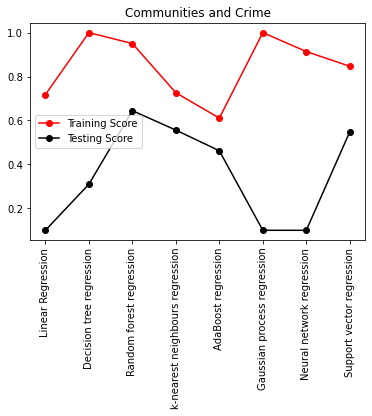

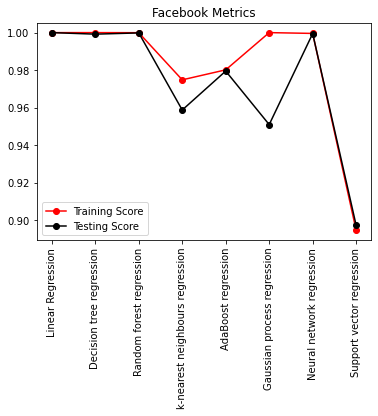

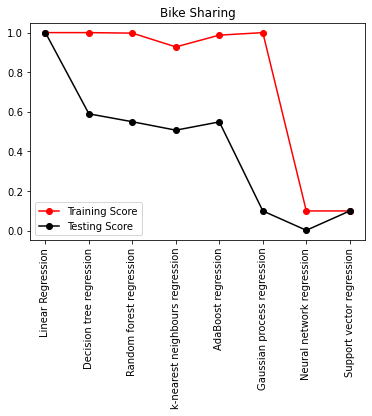

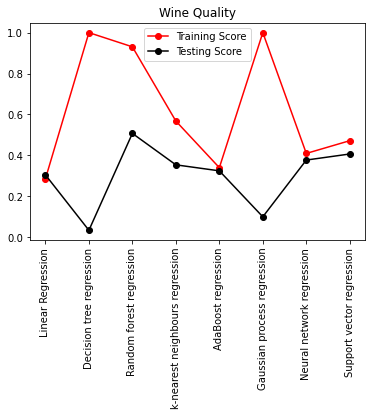

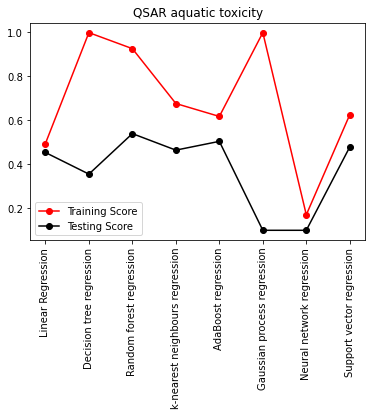

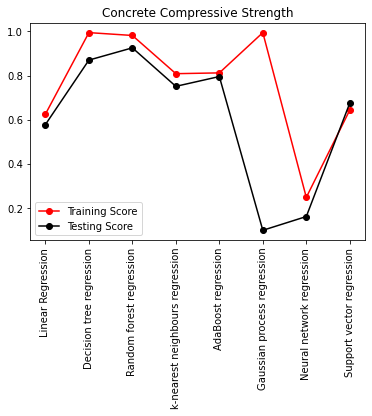

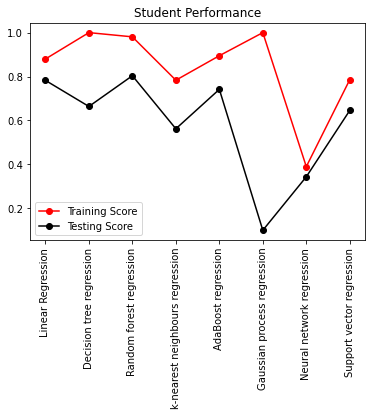

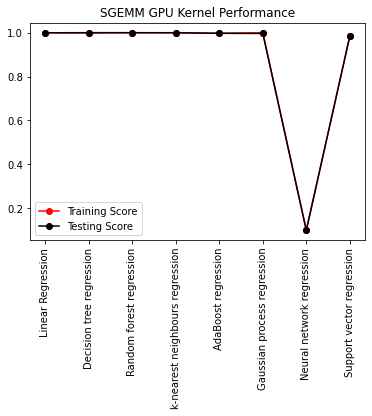

In [33]:
plot_results() #for direct_fit regressors


Average scores for direct fit:


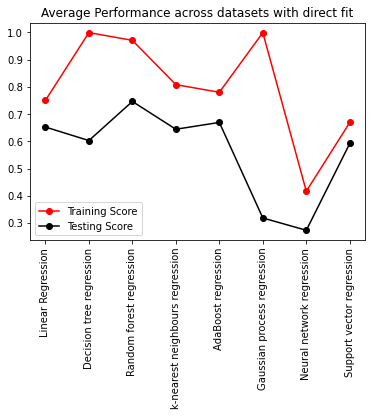

In [34]:
#finding average performance of regressors
avg_train_scores=np.mean(np.array(train_scores), axis=0)
avg_test_scores=np.mean(np.array(test_scores), axis=0)
print("Average scores for direct fit:")
    
fig, ax=plt.subplots()
plt.xticks(rotation=90)
ax.set_title("Average Performance across datasets with direct fit")
ax.plot(regressor_names, avg_train_scores, label='Training Score', color='red', marker='o')
ax.plot(regressor_names, avg_test_scores, label='Testing Score', color='black', marker='o')      
ax.legend()

In [35]:
print("Training scores:")
print(avg_train_scores)
print("Testing scores:")
print(avg_test_scores)

Training scores:
[0.7503664  0.99925388 0.97088052 0.80817626 0.78006693 0.99919468
 0.41656102 0.66916111]
Testing scores:
[0.65241027 0.60275701 0.74638142 0.64428411 0.66936094 0.31838524
 0.27313266 0.59216127]


In [36]:
from sklearn.gaussian_process.kernels import RBF

#params for grid search and random search cv

params = []
params.append({})
params.append({'C':1, 'kernel':'rbf', 'gamma':'auto', 'epsilon':0.1})
params.append({'max_depth':(None,), 'min_samples_leaf':(1,)})
params.append({'n_estimators':(10,), 'max_depth':(None,)})
params.append({})
params.append({'n_estimators':(10,),'learning_rate':(1.,)})
params.append({'kernel':(1.0* RBF(1.0)), 'alpha':(1e-10,), 'normalize_y':(True,)})
params.append({'early_stopping':(False,), 'hidden_layer_sizes':(100,), 'activation':('relu',), 'batch_size':('auto',),\
              'max_iter':200})


In [60]:
#https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
#RandomizedSearchCV
def apply_regression_rs(obj, train_score, test_score):
    regressors=[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),\
                AdaBoostRegressor(), GaussianProcessRegressor(), MLPRegressor(max_iter=100), SVR() ]
    for i in range(len(regressors)):
        cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
        regressor=RandomizedSearchCV(estimators=regressors[i], param_distributions=params[i], cv=cv, random_state=0, scoring='accuracy');
        print(regressor_names[i])
        regressor.fit(obj.x_train, obj.y_train)
        y_predict=regressor.predict(obj.x_test)
        train_score.append(regressor.best_score_(obj.x_train, obj.y_train))
        test_score.append(regressor.best_score_(obj.x_test, obj.y_test))
        print(regressor.best_score_(obj.x_train, obj.y_train))
        print(regressor.best_score_(obj.x_test, obj.y_test))
        print("")


In [61]:
for i in range(len(obj)):
    train_scr=[]
    test_scr=[]
    
    print("Data Set: %s \n" % titles[i])
    apply_regression(obj[i], train_scr, test_scr)
    test_scores.append(test_scr)
    train_scores.append(train_scr)
    print("\n\n")


Data Set: Communities and Crime 

Linear Regression
0.7176516859671732
0.1

Decision tree regression
1.0
0.2675676484798635

Random forest regression
0.9511048481045019
0.6411035963103675

k-nearest neighbours regression
0.726298259300233
0.5562014281173444

AdaBoost regression
0.6133518668505644
0.4854188498617894

Gaussian process regression
1.0
0.1

Neural network regression
0.906746337231399
0.1

Support vector regression
0.8466239502669322
0.5484174429852048




Data Set: Facebook Metrics 

Linear Regression
1.0
1.0

Decision tree regression
1.0
0.999148423220913

Random forest regression
0.9999600905209513
0.9998339652301307

k-nearest neighbours regression
0.9748460333220453
0.9587817287026642

AdaBoost regression
0.9816101060096075
0.9808531334898881

Gaussian process regression
1.0
0.9510164414767213

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9996377047327549
0.9995621623799334

Support vector regression
0.8947240682999966
0.8973617231584267




Data Set: Bike Sharing 

Linear Regression
0.999999965728199
0.9999998638103724

Decision tree regression
1.0
0.5991892770116108

Random forest regression
0.9977152370603378
0.5481484958599092

k-nearest neighbours regression
0.9278751408481243
0.5076142141260527

AdaBoost regression
0.9893929685104842
0.5742350722194625

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1
0.00738081924020173

Support vector regression
0.1
0.1




Data Set: Wine Quality 

Linear Regression
0.285690484842979
0.3049950147008007

Decision tree regression
1.0
0.06703192671627256

Random forest regression
0.930005218167651
0.5050856135408426

k-nearest neighbours regression
0.5678927080658398
0.35397448972591783

AdaBoost regression
0.3422886124079696
0.31525469682476726

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4101353754868239
0.3798142889237902

Support vector regression
0.47194341083283775
0.4069542686220885




Data Set: QSAR aquatic toxicity 

Linear Regression
0.49467794550016575
0.45385701528074496

Decision tree regression
0.9991403815285058
0.1777232685657898

Random forest regression
0.9256735759709811
0.5223409250661433

k-nearest neighbours regression
0.6766591544205361
0.46460783867503974

AdaBoost regression
0.6272860245234104
0.4955646901179266

Gaussian process regression
0.9991395808031673
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.11489373432701888
0.1

Support vector regression
0.626006959598777
0.47910483951632465




Data Set: Concrete Compressive Strength 

Linear Regression
0.6258082214141357
0.5787164093036458

Decision tree regression
0.9948906423492005
0.8656760587362551

Random forest regression
0.9821585309386932
0.9245108862456538

k-nearest neighbours regression
0.8089929771884918
0.7516554805726083

AdaBoost regression
0.8142380299368329
0.7946882695234001

Gaussian process regression
0.9948848790482739
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2003943076463569
0.10709360884898378

Support vector regression
0.644326949772051
0.6761453468368382




Data Set: Student Performance 

Linear Regression
0.8798762463041925
0.7825576155271756

Decision tree regression
1.0
0.6781136407116893

Random forest regression
0.9782800063765741
0.804733164339009

k-nearest neighbours regression
0.7833210269922485
0.5621771570690645

AdaBoost regression
0.900972867196519
0.7622492475993187

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.3389482643737747
0.28019456204000426

Support vector regression
0.785860454900458
0.6458110126935218




Data Set: SGEMM GPU Kernel Performance 

Linear Regression
0.9992266832613104
0.9991562078763073

Decision tree regression
0.9999999996336579
0.9989268825309787

Random forest regression
0.9998947993396601
0.9993176046953194

k-nearest neighbours regression
0.9995247789525125
0.9992605585542633

AdaBoost regression
0.9970862154536391
0.9970794412814135

Gaussian process regression
0.999532964357478
0.9960654629248156

Neural network regression
0.1
0.1

Support vector regression
0.9838030640287599
0.9834955109025583






C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


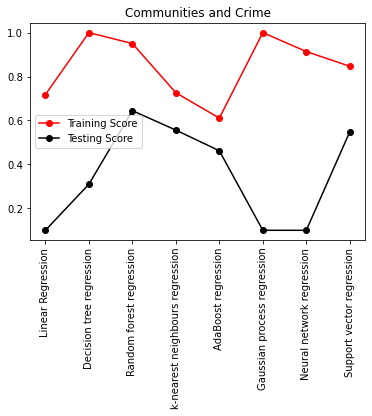

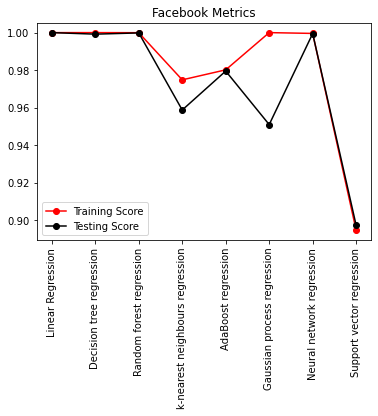

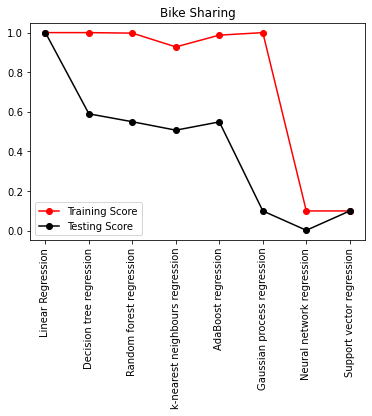

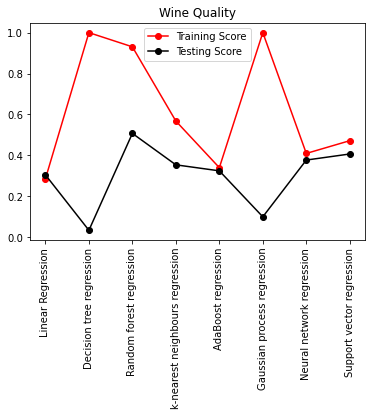

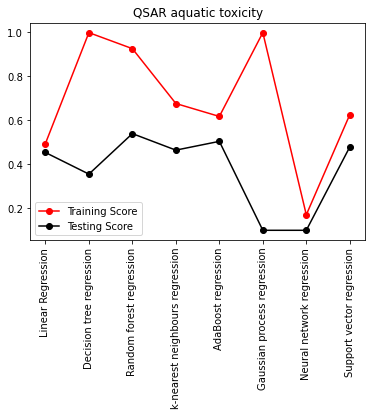

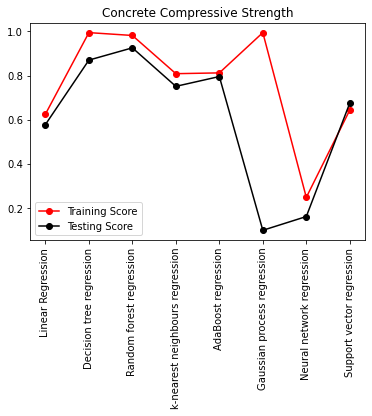

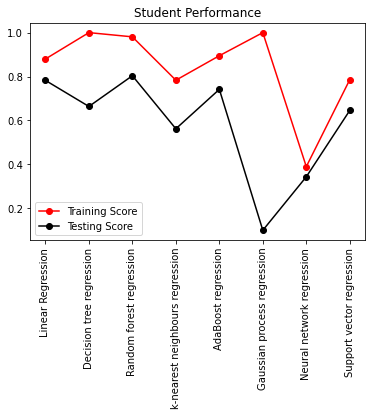

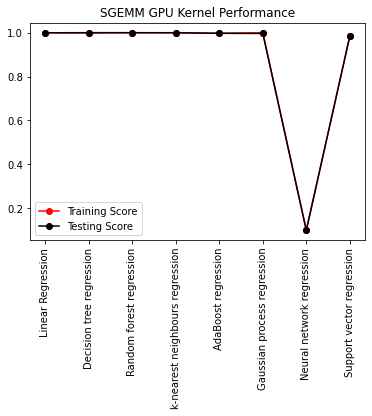

In [62]:
plot_results() #for randomizedSearch cv regressors

Average scores for RandomizedSearchCV:


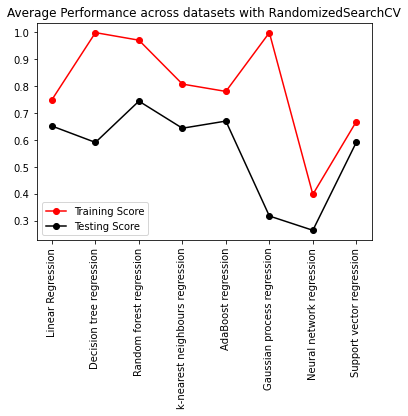

In [63]:
avg_train_scores=np.mean(np.array(train_scores), axis=0)
avg_test_scores=np.mean(np.array(test_scores), axis=0)
print("Average scores for RandomizedSearchCV:")
    
fig, ax=plt.subplots()
plt.xticks(rotation=90)
ax.set_title("Average Performance across datasets with RandomizedSearchCV")
ax.plot(regressor_names, avg_train_scores, label='Training Score', color='red', marker='o')
ax.plot(regressor_names, avg_test_scores, label='Testing Score', color='black', marker='o')      
ax.legend()

In [64]:
print("Training scores:")
print(avg_train_scores)
print("Testing scores:")
print(avg_test_scores)

Training scores:
[0.7503664  0.99925388 0.97113117 0.80817626 0.78094538 0.99919468
 0.39856172 0.66916111]
Testing scores:
[0.65241027 0.59160423 0.74486484 0.64428411 0.67082627 0.31838524
 0.26536765 0.59216127]


In [55]:
#https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
#gridSearchCV
def apply_regression_gs(obj, train_score, test_score):
    regressors=[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),\
                AdaBoostRegressor(), GaussianProcessRegressor(), MLPRegressor(max_iter=100), SVR() ]
    for i in range(len(regressors)):
        cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
        regressor=GridSearchCV(estimators=regressors[i], param_distributions=params[i], cv=cv, random_state=0, scoring='accuracy');
        print(regressor_names[i])
        regressor.fit(obj.x_train, obj.y_train)
        y_predict=regressor.predict(obj.x_test)
        train_score.append(regressor.best_score_(obj.x_train, obj.y_train))
        test_score.append(regressor.best_score_(obj.x_test, obj.y_test))
        print(regressor.best_score_(obj.x_train, obj.y_train))
        print(regressor.best_score_(obj.x_test, obj.y_test))
        print("")


In [56]:
for i in range(len(obj)):
    train_scr=[]
    test_scr=[]
    
    print("Data Set: %s \n" % titles[i])
    apply_regression(obj[i], train_scr, test_scr)
    test_scores.append(test_scr)
    train_scores.append(train_scr)
    print("\n\n")

Data Set: Communities and Crime 

Linear Regression
0.7176516859671732
0.1

Decision tree regression
1.0
0.28717633018928745

Random forest regression
0.9503912016220831
0.642071935608076

k-nearest neighbours regression
0.726298259300233
0.5562014281173444

AdaBoost regression
0.6192391120354968
0.4867856532781366

Gaussian process regression
1.0
0.1

Neural network regression
0.8803515458202595
0.1

Support vector regression
0.8466239502669322
0.5484174429852048




Data Set: Facebook Metrics 

Linear Regression
1.0
1.0

Decision tree regression
1.0
0.9992013231933359

Random forest regression
0.9999608749524835
0.9998245804705836

k-nearest neighbours regression
0.9748460333220453
0.9587817287026642

AdaBoost regression
0.9789016048857955
0.9782756186887551

Gaussian process regression
1.0
0.9510164414767213

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9995542156171132
0.999475520559068

Support vector regression
0.8947240682999966
0.8973617231584267




Data Set: Bike Sharing 

Linear Regression
0.999999965728199
0.9999998638103724

Decision tree regression
1.0
0.5859846718154599

Random forest regression
0.9974091483109839
0.5512049519912706

k-nearest neighbours regression
0.9278751408481243
0.5076142141260527

AdaBoost regression
0.9844015893452532
0.5793808689501605

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1
0.0183102994972123

Support vector regression
0.1
0.1




Data Set: Wine Quality 

Linear Regression
0.285690484842979
0.3049950147008007

Decision tree regression
1.0
0.07938003356855716

Random forest regression
0.931035117571235
0.5106278554997097

k-nearest neighbours regression
0.5678927080658398
0.35397448972591783

AdaBoost regression
0.3377071546127388
0.31252128943248425

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4283050300261215
0.38794009667506046

Support vector regression
0.47194341083283775
0.4069542686220885




Data Set: QSAR aquatic toxicity 

Linear Regression
0.49467794550016575
0.45385701528074496

Decision tree regression
0.9991403815285058
0.18462561624538787

Random forest regression
0.9312421410918563
0.5321116726270069

k-nearest neighbours regression
0.6766591544205361
0.46460783867503974

AdaBoost regression
0.6163443616514257
0.4916225680638575

Gaussian process regression
0.9991395808031673
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.21245715344990956
0.1

Support vector regression
0.626006959598777
0.47910483951632465




Data Set: Concrete Compressive Strength 

Linear Regression
0.6258082214141357
0.5787164093036458

Decision tree regression
0.9948906423492005
0.8605572726264975

Random forest regression
0.9821016789906601
0.9254692565236632

k-nearest neighbours regression
0.8089929771884918
0.7516554805726083

AdaBoost regression
0.8159998289203426
0.8032898341219082

Gaussian process regression
0.9948848790482739
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.254290615649029
0.15848272354595505

Support vector regression
0.644326949772051
0.6761453468368382




Data Set: Student Performance 

Linear Regression
0.8798762463041925
0.7825576155271756

Decision tree regression
1.0
0.6632867801798354

Random forest regression
0.9799262892934832
0.7979987086282763

k-nearest neighbours regression
0.7833210269922485
0.5621771570690645

AdaBoost regression
0.8996683312190384
0.7653828782256838

Gaussian process regression
1.0
0.1

Neural network regression


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.37765627919315103
0.3217783576733996

Support vector regression
0.785860454900458
0.6458110126935218




Data Set: SGEMM GPU Kernel Performance 

Linear Regression
0.9992266832613104
0.9991562078763073

Decision tree regression
0.9999999996336579
0.998890375241049

Random forest regression
0.9998900087025753
0.9993138740021374

k-nearest neighbours regression
0.9995247789525125
0.9992605585542633

AdaBoost regression
0.9965645893542164
0.9966401614662196

Gaussian process regression
0.999532964357478
0.9960654629248156

Neural network regression
0.1
0.1

Support vector regression
0.9838030640287599
0.9834955109025583






C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


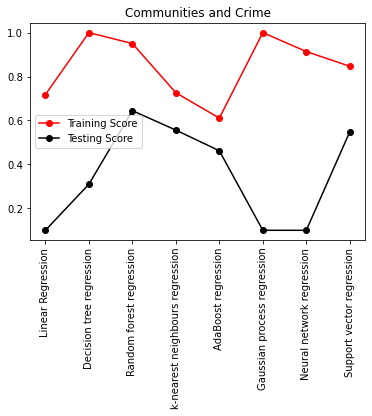

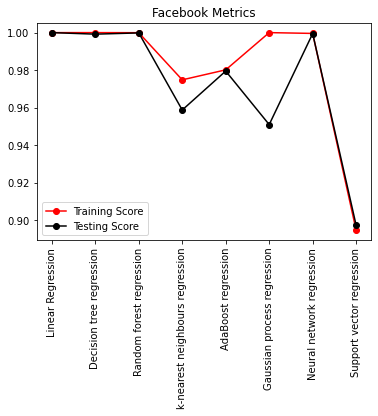

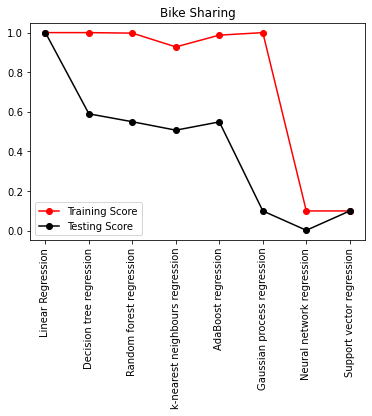

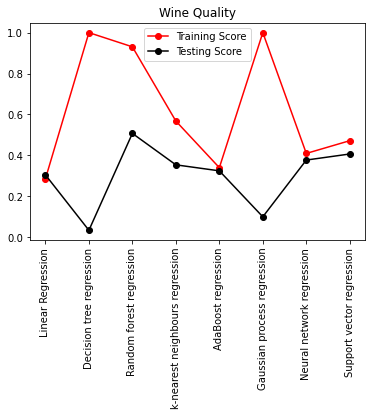

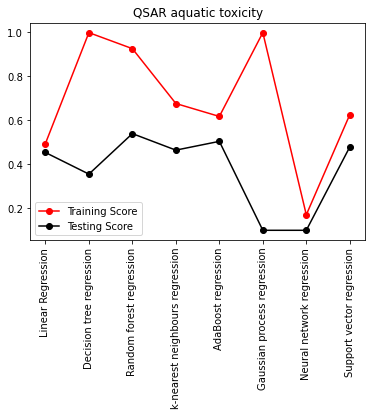

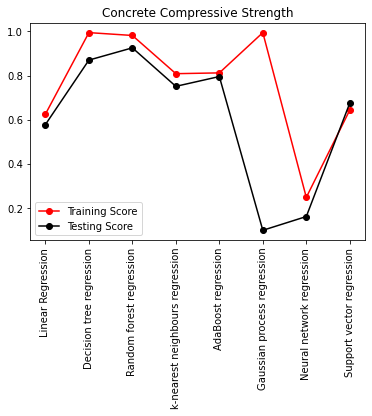

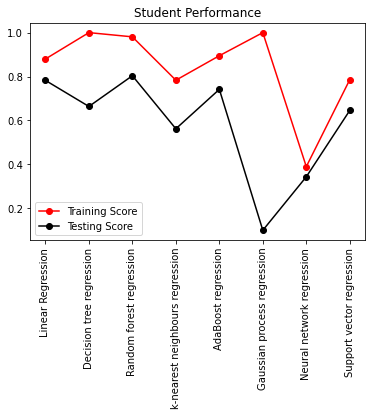

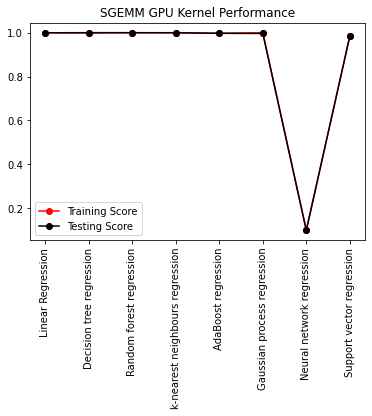

In [57]:
plot_results() #for gridSearchCV regressors

Average scores for GridSearchCV:


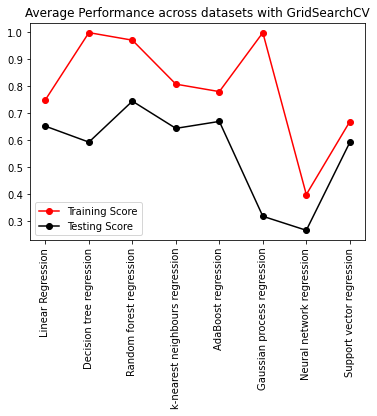

In [58]:
avg_train_scores=np.mean(np.array(train_scores), axis=0)
avg_test_scores=np.mean(np.array(test_scores), axis=0)
print("Average scores for GridSearchCV:")
    
fig, ax=plt.subplots()
plt.xticks(rotation=90)
ax.set_title("Average Performance across datasets with GridSearchCV")
ax.plot(regressor_names, avg_train_scores, label='Training Score', color='red', marker='o')
ax.plot(regressor_names, avg_test_scores, label='Testing Score', color='black', marker='o')      
ax.legend()

In [59]:
print("Training scores:")
print(avg_train_scores)
print("Testing scores:")
print(avg_test_scores)

Training scores:
[0.7503664  0.99925388 0.97121986 0.80817626 0.78055655 0.99919468
 0.39893126 0.66916111]
Testing scores:
[0.65241027 0.59325957 0.74515327 0.64428411 0.67001933 0.31838524
 0.26638632 0.59216127]
